## Apply CNN to predict cat and dog from given image dataset

### Importing essentials

In [1]:
import os
import warnings
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')
warnings.filterwarnings("ignore")

# importing essentials from tensorflow library for CNN model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dropout, Dense

### Building Convolutional Neural Network model

In [2]:
# configuring model as sequential
classifier = Sequential()

# step 1 convolutional layer: to make build feature maps using feature detectors & removing linearity using relu
classifier.add(Convolution2D(32, 3, 3, input_shape=(64,64,3), activation='relu'))

# setp 2 maxpool layer: to build pooled feaure map to accomodate invariance in tilt/flip/orientation still catch feature
# reducing size with maxpooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# repeating steps 1 & 2 to make features more prominent for classification
classifier.add(Convolution2D(64, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# prevent overfitting
classifier.add(Dropout(0.2))

# step 3 flatteing: to get flattened long vector of these values to be passed as inputs to neural network 
classifier.add(Flatten())

# Step 4 Building neural network: learning patterns in given inputs using dense ntwork
# input to neural network
classifier.add(Dense(128, activation='relu'))

# output layer
classifier.add(Dense(1, activation='sigmoid'))

# setting parameters such as optmizing algo, loss fn, evaluation formula for classifier model  
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Image Preprocessing

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# converting image to 3D matrices & scaling as well
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# defining necessary scaling for test set images same as train set images
test_datagen = ImageDataGenerator(rescale=1./255)

# loading images into train set from directory & defining iamge pixel-size 
train_set = train_datagen.flow_from_directory('dataset/training_set',
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='binary')

# loading images into test set from direcrtory & defining pixel size
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Fitting model

In [4]:
epochs = 50
batch_size = 16

# fitting model & storing it to history to get evaluation metrics
history = classifier.fit_generator(train_set,
                    steps_per_epoch=8000/batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=2000/batch_size)

Epoch 1/50
500/500 [==============================] - 36s 72ms/step - loss: 0.6847 - acc: 0.5481 - val_loss: 0.6752 - val_acc: 0.5798
Epoch 2/50
500/500 [==============================] - 33s 66ms/step - loss: 0.6633 - acc: 0.6035 - val_loss: 0.6484 - val_acc: 0.6182
Epoch 3/50
500/500 [==============================] - 33s 66ms/step - loss: 0.6498 - acc: 0.6176 - val_loss: 0.6386 - val_acc: 0.6253
Epoch 4/50
500/500 [==============================] - 33s 66ms/step - loss: 0.6326 - acc: 0.6440 - val_loss: 0.6169 - val_acc: 0.6604
Epoch 5/50
500/500 [==============================] - 33s 66ms/step - loss: 0.6233 - acc: 0.6489 - val_loss: 0.6250 - val_acc: 0.6591
Epoch 6/50
500/500 [==============================] - 33s 65ms/step - loss: 0.6082 - acc: 0.6669 - val_loss: 0.6027 - val_acc: 0.6792
Epoch 7/50
500/500 [==============================] - 33s 66ms/step - loss: 0.6062 - acc: 0.6712 - val_loss: 0.6034 - val_acc: 0.6712
Epoch 8/50
500/500 [==============================] - 33s 66ms

### Plotting evaluation on train set & test set

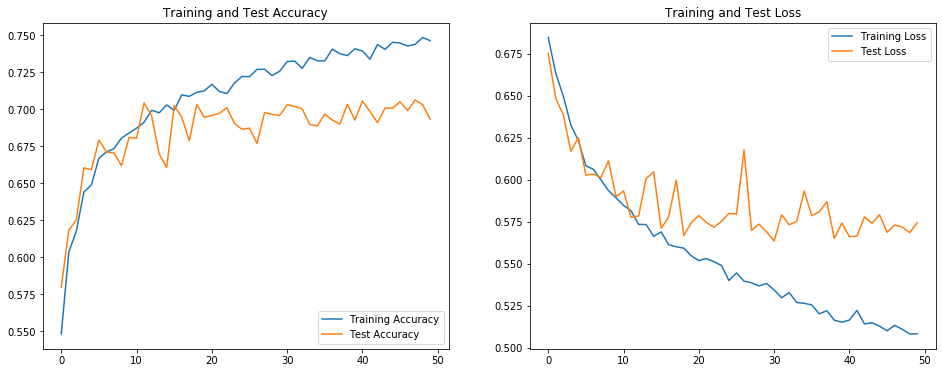

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()